# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1450]:
#Imports
import pandas as pd
from math import sqrt
import numpy as np 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [1451]:
#imports dataset
traffic_accidents = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv', sep=';')
driving_license = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv',sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [1452]:
traffic_accidents.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [1453]:
driving_license.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer: in Traffic accidents dataset they have columns unnecessary and missing value and some confuse values in region column and value column had a string type rather int value 
driving license dataset have unnecessary column unnamed and value columns had a string value 

#### 4a. How complete is the data?

Investigate missing values etc.

In [1454]:
# display information about our dataset
traffic_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


In [1455]:
driving_license.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [1456]:
#check the shape of our dataset
traffic_accidents.shape

(84, 7)

In [1457]:
driving_license.shape 

(350, 5)

In [1458]:
traffic_accidents.isnull().sum() # to show where value is missing and how many value is missing

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [1459]:
driving_license.isnull().sum()

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [1460]:
# we cloud use .min() & .max() to show the minimum and maximum value of dataset , but i prefer to use .describe() to combine the steps on one step 
# and the value pf min is 0 & mix is 83
traffic_accidents.describe()

,Unnamed: 0,Unnamed: 0.1
count,84.000000,84.000000
mean,41.500000,41.500000
std,24.392622,24.392622
min,0.000000,0.000000
25%,20.750000,20.750000
50%,41.500000,41.500000
75%,62.250000,62.250000
max,83.000000,83.000000


In [1461]:
#we cloud use .min() & .max() to show the minimum and maximum value of dataset , but i prefer to use .describe() to combine the steps on one step 
# and the value pf min is 0 & mix is 349
driving_license.describe()

,Unnamed: 0
count,350.000000
mean,174.500000
std,101.180532
min,0.000000
25%,87.250000
50%,174.500000
75%,261.750000
max,349.000000


#### 5. What are your data types? 
Display the data types of each feature. 

In [1462]:
traffic_accidents.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [1463]:
#code
driving_license.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: yes
traffic accidents dataset : year - value should be int
driving license dataset : year - driving liceses should be int

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [1464]:
def change_type(x) :
    if pd.notnull(x) :
        if 'n' in x:
            x= x.replace('n','')            
        else :
            x= x.replace('(','')
            x= x.replace(')','')
        x = int(x)
    else :
        x 
    return x

In [1465]:
traffic_accidents['Year'] = traffic_accidents['Year'].map(change_type)

In [1466]:
traffic_accidents['Value'] = traffic_accidents['Value'].map(change_type)

In [1467]:
traffic_accidents.dtypes #check the datatype after change it

Unnamed: 0       int64
Unnamed: 0.1     int64
Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
dtype: object

In [1468]:
driving_license['Year'] = driving_license['Year'].map(change_type)

In [1469]:
driving_license['Driving Liceses'] = driving_license['Driving Liceses'].map(change_type)

In [1470]:
driving_license.dtypes

Unnamed: 0              int64
Year                    int64
Administritive Area    object
Driving Liceses         int64
geo_point_2d           object
dtype: object

- Make new columns `x` and `y` using `geo_point_2d`

In [1471]:
traffic_accidents['x & y']=  traffic_accidents['geo_point_2d'].map(lambda x : [x,x] if type(x) != str else x.split(', '))

In [1472]:
traffic_accidents['x'] = traffic_accidents['x & y'][:].apply(lambda x: x[0])

In [1473]:
traffic_accidents['y'] = traffic_accidents['x & y'][:].apply(lambda x: x[1])                                                            

In [1474]:
traffic_accidents.head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x & y,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334","[21.628962766, 41.2636898334]",21.628962766,41.2636898334
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439","[23.2883307307, 50.1478302439]",23.2883307307,50.1478302439
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394","[27.90165499, 37.2598581394]",27.90165499,37.2598581394
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508","[27.400845724, 41.4406960508]",27.400845724,41.4406960508
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508","[27.400845724, 41.4406960508]",27.400845724,41.4406960508


In [1475]:
driving_license['x & y']=  driving_license['geo_point_2d'].map(lambda x : [x,x] if type(x) != str else x.split(', ')) #create x&y column to save a new column and play with it rther deo_piont

In [1476]:
driving_license['x'] = driving_license['x & y'][:].apply(lambda x: x[0])

In [1477]:
driving_license['y'] = driving_license['x & y'][:].apply(lambda x: x[1])                                                                    

In [1478]:
driving_license.head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x & y,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334","[21.628962766, 41.2636898334]",21.628962766,41.2636898334
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334","[21.628962766, 41.2636898334]",21.628962766,41.2636898334
2,2,1998,Makkah,86082,"21.628962766, 41.2636898334","[21.628962766, 41.2636898334]",21.628962766,41.2636898334
3,3,2004,Makkah,86636,"21.628962766, 41.2636898334","[21.628962766, 41.2636898334]",21.628962766,41.2636898334
4,4,2005,Makkah,65099,"21.628962766, 41.2636898334","[21.628962766, 41.2636898334]",21.628962766,41.2636898334


- Fix any individual values preventing other columns from being the appropriate type.

In [1479]:
# all fixed above
traffic_accidents.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
x & y           object
x               object
y               object
dtype: object

In [1480]:
driving_license.dtypes

Unnamed: 0              int64
Year                    int64
Administritive Area    object
Driving Liceses         int64
geo_point_2d           object
x & y                  object
x                      object
y                      object
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [1481]:
# split column of indector to be more clear 
traffic_accidents['num_accidents_result'] =traffic_accidents['Indicator'].apply(lambda x: x.split(' - ')[0] if  len(x.split(' - ')) >1 else x )

In [1482]:
traffic_accidents['accidents_result'] = traffic_accidents['Indicator'].apply(lambda x: x.split(' - ')[1] if  len(x.split(' - ')) >1 else 'not_Effict')

In [1483]:
traffic_accidents.head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x & y,x,y,num_accidents_result,accidents_result
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334","[21.628962766, 41.2636898334]",21.628962766,41.2636898334,No. of Casualties,Injured
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439","[23.2883307307, 50.1478302439]",23.2883307307,50.1478302439,No. of Casualties,Dead
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394","[27.90165499, 37.2598581394]",27.90165499,37.2598581394,No. of Casualties,Dead
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508","[27.400845724, 41.4406960508]",27.400845724,41.4406960508,No. of Casualties,Dead
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508","[27.400845724, 41.4406960508]",27.400845724,41.4406960508,No. of Accidents,not_Effict


In [1484]:
#drop all columns we don't need it from our dataset
traffic_accidents.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [1485]:
traffic_accidents.drop(['Unnamed: 0.1'], axis = 1, inplace = True)

In [1486]:
traffic_accidents.drop(['geo_point_2d'], axis = 1, inplace = True)

In [1487]:
traffic_accidents.drop(['Indicator'], axis = 1, inplace = True)

In [1488]:
traffic_accidents.drop(['x & y'], axis = 1, inplace = True)

In [1489]:
traffic_accidents.head() #check after delete our columns

,Year,Region,Value,x,y,num_accidents_result,accidents_result
0,2016,Makkah,12383,21.628962766,41.2636898334,No. of Casualties,Injured
1,2016,Eastern Region,1113,23.2883307307,50.1478302439,No. of Casualties,Dead
2,2016,Tabouk,434,27.90165499,37.2598581394,No. of Casualties,Dead
3,2016,Hail,299,27.400845724,41.4406960508,No. of Casualties,Dead
4,2016,Hail,10199,27.400845724,41.4406960508,No. of Accidents,not_Effict


In [1490]:
driving_license.head()

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x & y,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334","[21.628962766, 41.2636898334]",21.628962766,41.2636898334
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334","[21.628962766, 41.2636898334]",21.628962766,41.2636898334
2,2,1998,Makkah,86082,"21.628962766, 41.2636898334","[21.628962766, 41.2636898334]",21.628962766,41.2636898334
3,3,2004,Makkah,86636,"21.628962766, 41.2636898334","[21.628962766, 41.2636898334]",21.628962766,41.2636898334
4,4,2005,Makkah,65099,"21.628962766, 41.2636898334","[21.628962766, 41.2636898334]",21.628962766,41.2636898334


In [1491]:
driving_license.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [1492]:
driving_license.drop(['geo_point_2d'], axis = 1, inplace = True)

In [1493]:
driving_license.drop(['x & y'], axis = 1, inplace = True)

In [1494]:
driving_license.head()

,Year,Administritive Area,Driving Liceses,x,y
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


- Display the data types again to confirm they are correct.

In [1495]:
traffic_accidents.dtypes

Year                     int64
Region                  object
Value                    int64
x                       object
y                       object
num_accidents_result    object
accidents_result        object
dtype: object

In [1496]:
driving_license.dtypes

Year                    int64
Administritive Area    object
Driving Liceses         int64
x                      object
y                      object
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [1497]:
# I like u are encouraging us from now to SQL ♥️🙄

In [1498]:
traffic_accidents= traffic_accidents.rename(index=str, columns={'Year': 'year', 'Region': 'region','Value':'num_traffic_accidents','x':'latitude_accidents','y':'longitude_accidents'})

In [1499]:
traffic_accidents.head()

,year,region,num_traffic_accidents,latitude_accidents,longitude_accidents,num_accidents_result,accidents_result
0,2016,Makkah,12383,21.628962766,41.2636898334,No. of Casualties,Injured
1,2016,Eastern Region,1113,23.2883307307,50.1478302439,No. of Casualties,Dead
2,2016,Tabouk,434,27.90165499,37.2598581394,No. of Casualties,Dead
3,2016,Hail,299,27.400845724,41.4406960508,No. of Casualties,Dead
4,2016,Hail,10199,27.400845724,41.4406960508,No. of Accidents,not_Effict


In [1500]:
driving_license= driving_license.rename(index=str, columns={'Year': 'year', 'Administritive Area': 'region','Driving Liceses':'driving_licenses', 'x':'latitude_driving_licenes','y':'longitude_driving_licenes'})

In [1501]:
driving_license.head()

,year,region,driving_licenses,latitude_driving_licenes,longitude_driving_licenes
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|Driving_Licenses/Traffic_Accidents|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|integer|Traffic_Accidents|The year when the accidents happened| 
|reigon|object|Traffic_Accidents|The cities or region of the accidents| 
|num_traffic_accidents|integer|Traffic_Accidents|The number of Traffic_Accidents happend| 
|latitude_accidents|object|Traffic_Accidents|This column present the latitude geographic coordinate of place the accidents| 
|longitude_accidents|object|Traffic_Accidents|This column present the longitude geographic coordinate of place the accidents| 
|num_accidents_result|object|Traffic_Accidents|Display the status of accidents| 
|accidents_result|object|Traffic_Accidents|The final status of the person how had an accients| 
|year|integer|Driving_Licenses|The year of driving licenses issued| 
|reigon|object|Driving_Licenses|The cities or region of driving licenses issued| 
|driving_licenses|integer|Driving_Licenses|The number of driving licenses| 
|latitude_accidents|object|Driving_Licenses|This column present the latitude geographic coordinate of place the driving licenses issued| 
|longitude_accidents|object|Driving_Licenses|This column present the longitude geographic coordinate of place the driving licenses issued| 


#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [1502]:
# Which rows are not associated with regions?
traffic_accidents.region.unique() # Total 

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [1503]:
# 1. Confirm the numbers of all regions add up to total.
traffic_accidents_total = traffic_accidents[traffic_accidents.region == 'Total']
driving_license_total = driving_license[driving_license.region == 'Total']

In [1504]:
traffic_accidents_total

,year,region,num_traffic_accidents,latitude_accidents,longitude_accidents,num_accidents_result,accidents_result
8,2017,Total,7489,NaN,NaN,No. of Casualties,Dead
29,2016,Total,533380,NaN,NaN,No. of Accidents,not_Effict
30,2016,Total,38120,NaN,NaN,No. of Casualties,Injured
68,2017,Total,460488,NaN,NaN,No. of Accidents,not_Effict
69,2017,Total,33199,NaN,NaN,No. of Casualties,Injured
77,2016,Total,9031,NaN,NaN,No. of Casualties,Dead


In [1505]:
driving_license_total

,year,region,driving_licenses,latitude_driving_licenes,longitude_driving_licenes
58,2015,Total,435439,NaN,NaN
59,2017,Total,928165,NaN,NaN
60,1993,Total,294893,NaN,NaN
61,1994,Total,303520,NaN,NaN
62,2003,Total,254858,NaN,NaN
63,2006,Total,267508,NaN,NaN
142,2014,Total,625414,NaN,NaN
143,2010,Total,386510,NaN,NaN
144,2012,Total,411204,NaN,NaN
145,1999,Total,332210,NaN,NaN


In [1506]:
traffic_accidents_total.num_traffic_accidents.sum()

1081707

In [1507]:
traffic_accidents.num_traffic_accidents.sum() - traffic_accidents_total.num_traffic_accidents.sum()

1081707

In [1508]:
driving_license_total.driving_licenses.sum()

9397488

In [1509]:
driving_license.driving_licenses.sum() - driving_license_total.driving_licenses.sum() 

9397488

In [1510]:
# 2. Remove the rows that are not associated with regions
traffic_accidents = traffic_accidents[traffic_accidents.region!= 'Total']

In [1511]:
traffic_accidents.region.value_counts()

Hail                6
Riyadh              6
Qassim              6
Tabouk              6
Asir                6
Jazan               6
Makkah              6
Al-Baaha            6
Northern Boarder    6
Madinah             6
Eastern Region      6
Al-Jouf             6
Najran              6
Name: region, dtype: int64

In [1512]:
traffic_accidents.region.isnull().sum ()

0

In [1513]:
traffic_accidents.shape

(78, 7)

In [1514]:
driving_license = driving_license[driving_license.region!= 'Total']

In [1515]:
driving_license.region.value_counts()

Hail                25
Riyadh              25
Al-Baha             25
Al-Qaseem           25
Tabouk              25
Makkah              25
Northern Boarder    25
Assir               25
Eastern             25
Madinah             25
Al-Jouf             25
Najran              25
Jazan               25
Name: region, dtype: int64

In [1516]:
driving_license.shape

(325, 5)

In [1517]:
# traffic_accidents = traffic_accidents.set_index('year')

In [1518]:
driving_license.shape

(325, 5)

In [1519]:
traffic_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 0 to 83
Data columns (total 7 columns):
year                     78 non-null int64
region                   78 non-null object
num_traffic_accidents    78 non-null int64
latitude_accidents       78 non-null object
longitude_accidents      78 non-null object
num_accidents_result     78 non-null object
accidents_result         78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.9+ KB


In [1520]:
driving_license.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 0 to 349
Data columns (total 5 columns):
year                         325 non-null int64
region                       325 non-null object
driving_licenses             325 non-null int64
latitude_driving_licenes     325 non-null object
longitude_driving_licenes    325 non-null object
dtypes: int64(2), object(3)
memory usage: 15.2+ KB


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [1521]:
#The traffic accident is long  
# it's a long stacked, because the individual observations are stacked on top of each other.
traffic_accidents.head()

,year,region,num_traffic_accidents,latitude_accidents,longitude_accidents,num_accidents_result,accidents_result
0,2016,Makkah,12383,21.628962766,41.2636898334,No. of Casualties,Injured
1,2016,Eastern Region,1113,23.2883307307,50.1478302439,No. of Casualties,Dead
2,2016,Tabouk,434,27.90165499,37.2598581394,No. of Casualties,Dead
3,2016,Hail,299,27.400845724,41.4406960508,No. of Casualties,Dead
4,2016,Hail,10199,27.400845724,41.4406960508,No. of Accidents,not_Effict


In [1522]:
# The driving licenses
# it's a wide, because this format will be wide in the horizontal direction
driving_license.head()

,year,region,driving_licenses,latitude_driving_licenes,longitude_driving_licenes
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [1523]:
traffic_accidents.head()

,year,region,num_traffic_accidents,latitude_accidents,longitude_accidents,num_accidents_result,accidents_result
0,2016,Makkah,12383,21.628962766,41.2636898334,No. of Casualties,Injured
1,2016,Eastern Region,1113,23.2883307307,50.1478302439,No. of Casualties,Dead
2,2016,Tabouk,434,27.90165499,37.2598581394,No. of Casualties,Dead
3,2016,Hail,299,27.400845724,41.4406960508,No. of Casualties,Dead
4,2016,Hail,10199,27.400845724,41.4406960508,No. of Accidents,not_Effict


In [1524]:
traffic_accidents_pivoting = traffic_accidents.pivot_table(index =['year', 'region'] , columns= 'accidents_result' , values='num_traffic_accidents') #we use pivot_table to avoid duplicate data 

In [1525]:
traffic_accidents_pivoting

accidents_result       Dead  Injured  not_Effict
year region                                     
2016 Al-Baaha           185     1227        3618
     Al-Jouf            245      920       10212
     Asir               983     2541       32684
     Eastern Region    1113     4893      101619
     Hail               299      932       10199
     Jazan              514     2259       25873
     Madinah            822     4184       14475
     Makkah            2243    12383      134838
     Najran             173      706        3235
     Northern Boarder   193      631       13196
     Qassim             397     1513       25664
     Riyadh            1430     4207      141736
     Tabouk             434     1724       16031
2017 Al-Baaha           134     1007        1414
     Al-Jouf            240      862       10469
     Asir               828     2368       25245
     Eastern Region     963     4073       81433
     Hail               265      773        9379
     Jazan              466     2207       22161
     Madinah            580     2917       16070
     Makkah            1641    10623      145541
     Najran             194      766        3193
     Northern Boarder   112      374       11540
     Qassim             319     1446       22405
     Riyadh            1399     4540       99925
     Tabouk             348     1243       11713

In [1526]:
driving_license_pivoting = driving_license.pivot(index ='region' , columns= 'year', values="driving_licenses")

In [1527]:
driving_license.head()

,year,region,driving_licenses,latitude_driving_licenes,longitude_driving_licenes
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


In [1528]:
driving_license_pivoting

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
region,,,,,,,,,,,,,,,,,,,,,
Al-Baha,3270,2729,2423,1468,3027,5110,4246,4832,7594,3335,...,5418,9815,7076,6450,7593,7482,7268,4856,4614,4131
Al-Jouf,2884,2535,2270,2518,3565,3476,3950,4666,4756,5940,...,10929,10567,10937,10180,10246,11602,9982,10233,9371,8091
Al-Qaseem,73618,68916,49690,42693,10092,11350,9983,12226,14718,16298,...,22236,27571,36737,10760,11421,17889,29113,13631,9180,6318
Assir,6226,5185,4889,3319,12204,13220,14625,18622,20321,20417,...,18800,21582,21835,24515,23136,29730,29552,38567,41367,39133
Eastern,9964,10918,7831,8461,58814,70650,64973,65767,74119,85035,...,104626,108544,110295,151087,129971,123325,121774,135752,142307,126816
Hail,10484,11131,9735,10267,6606,4708,3139,3215,6077,5070,...,7413,7282,7637,9123,11082,9731,10417,7172,54507,22035
Jazan,6009,3826,2284,2226,5695,2613,4792,5678,10631,5254,...,11346,9437,12270,10946,11156,14175,15621,13931,11504,18345
Madinah,4122,3767,4155,3425,10495,13020,11108,9562,13561,10494,...,9194,11574,15045,14630,14459,28513,31447,22744,24540,36165
Makkah,65977,75349,60356,46195,76623,86082,103535,87053,85593,88593,...,77013,112045,113531,110647,143954,131108,149234,157389,136055,142487


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [1529]:
# i prefer use left merging but when go to viz section i saw it's better to use inner couse have the total of accidents number so i did it inner 😔
# data_merging = pd.merge( traffic_accidents_pivoting,driving_license, on=['year', 'region'], how='left')
dataset_merging = pd.merge( traffic_accidents,driving_license, on=['year', 'region'], how='inner')

In [1530]:
dataset_merging

,year,region,num_traffic_accidents,latitude_accidents,longitude_accidents,num_accidents_result,accidents_result,driving_licenses,latitude_driving_licenes,longitude_driving_licenes
0,2016,Makkah,12383,21.628962766,41.2636898334,No. of Casualties,Injured,136055,21.628962766,41.2636898334
1,2016,Makkah,134838,21.628962766,41.2636898334,No. of Accidents,not_Effict,136055,21.628962766,41.2636898334
2,2016,Makkah,2243,21.628962766,41.2636898334,No. of Casualties,Dead,136055,21.628962766,41.2636898334
3,2016,Tabouk,434,27.90165499,37.2598581394,No. of Casualties,Dead,13610,27.90165499,37.2598581394
4,2016,Tabouk,16031,27.90165499,37.2598581394,No. of Accidents,not_Effict,13610,27.90165499,37.2598581394
5,2016,Tabouk,1724,27.90165499,37.2598581394,No. of Casualties,Injured,13610,27.90165499,37.2598581394
6,2016,Hail,299,27.400845724,41.4406960508,No. of Casualties,Dead,54507,27.400845724,41.4406960508
7,2016,Hail,10199,27.400845724,41.4406960508,No. of Accidents,not_Effict,54507,27.400845724,41.4406960508
8,2016,Hail,932,27.400845724,41.4406960508,No. of Casualties,Injured,54507,27.400845724,41.4406960508
9,2016,Northern Boarder,193,30.197074783,41.8171186952,No. of Casualties,Dead,4958,30.197074783,41.8171186952


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [1582]:
dataset_merging.to_csv('../data/combined_datasets.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [1532]:
dataset_merging.describe().T # T is transpose

,count,mean,std,min,25%,50%,75%,max
year,54.0,2016.500000,0.504695,2016.0,2016.00,2016.5,2017.0,2017.0
num_traffic_accidents,54.0,14141.388889,34135.863621,112.0,592.75,1965.5,10584.5,145541.0
driving_licenses,54.0,69517.555556,121932.017236,2153.0,9371.00,16085.0,54507.0,495307.0


In [1533]:
traffic_accidents.describe().T

,count,mean,std,min,25%,50%,75%,max
year,78.0,2016.500000,0.503236,2016.0,2016.0,2016.5,2017.0,2017.0
num_traffic_accidents,78.0,13868.038462,31716.885363,112.0,721.0,1682.5,10584.5,145541.0


In [1534]:
driving_license.describe().T

,count,mean,std,min,25%,50%,75%,max
year,325.0,2005.000000,7.222222,1993.0,1999.0,2005.0,2011.0,2017.0
driving_licenses,325.0,28915.347692,47419.058819,915.0,4846.0,10267.0,25423.0,495307.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [1535]:
def std_man(list_items):
    # calculate mean
    total = 0
    for num in list_items:
        total = total + num
    mean = total / len(list_items)
    # adding the numbers in the list
    diff_list = []
    sum_diff = 0
    for num in list_items:
        diff_num = num - mean
        diff_num = diff_num * diff_num
        diff_list.append(diff_num)
         
        sum_diff = sum_diff + diff_num
    result = sum_diff / (len(list_items) - 1)
    return sqrt(result)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [1536]:
# apply the std function on my merge dataset
sd_dataset_merging = { key: std_man(dataset_merging[key].values) for key in dataset_merging.columns if key in ['year','num_traffic_accidents',
                                                                                                               'driving_licenses']}

In [1537]:
print(sd_dataset_merging)

{'year': 0.5046949386828399, 'num_traffic_accidents': 34135.86362094562, 'driving_licenses': 121932.0172358145}


In [1538]:
# apply the std function on traffic_accidents
sd_traffic_accidents = { key: std_man(traffic_accidents[key].values) for key in traffic_accidents.columns if key in ['year','num_traffic_accidents']}

In [1539]:
print(sd_traffic_accidents)

{'year': 0.5032362797401965, 'num_traffic_accidents': 31716.88536256985}


In [1540]:
# apply the std function on traffic_accidents
sd_driving_license = { key: std_man(driving_license[key].values) for key in driving_license.columns if key in ['year','driving_licenses']}

In [1541]:
print(sd_driving_license)

{'year': 7.222222222222222, 'driving_licenses': 47419.05881935999}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [1542]:
np.std(dataset_merging)

year                          0.500000
num_traffic_accidents     33818.313802
driving_licenses         120797.741259
dtype: float64

Answer: np.std use N-1 instead of N in the denominator of the standard deviation formula.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [1543]:
# Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
driving_license_h_l = driving_license.groupby(['year','region']).agg({'driving_licenses':sum})

In [1544]:
driving_license_h_l = driving_license_h_l['driving_licenses'].groupby(level=0, group_keys=False)

In [1545]:
driving_license_h_l.nlargest(1) # highest Driving Licenses 

year  region 
1993  Riyadh     103886
1994  Riyadh     110545
1995  Riyadh     101608
1996  Riyadh     110131
1997  Riyadh      92145
1998  Riyadh     114962
1999  Makkah     103535
2000  Makkah      87053
2001  Makkah      85593
2002  Makkah      88593
2003  Eastern     82697
2004  Makkah      86636
2005  Eastern     82505
2006  Eastern     79517
2007  Eastern    106511
2008  Eastern    104626
2009  Makkah     112045
2010  Makkah     113531
2011  Eastern    151087
2012  Makkah     143954
2013  Riyadh     165994
2014  Riyadh     194208
2015  Makkah     157389
2016  Riyadh     242851
2017  Riyadh     495307
Name: driving_licenses, dtype: int64

In [1546]:
driving_license_h_l.nsmallest(1) #lowest Driving Licenses 

year  region          
1993  Northern Boarder    1510
1994  Northern Boarder    1457
1995  Northern Boarder    1318
1996  Northern Boarder    1383
1997  Northern Boarder    1531
1998  Northern Boarder    2014
1999  Northern Boarder    2311
2000  Northern Boarder    2894
2001  Northern Boarder    2971
2002  Northern Boarder    2268
2003  Northern Boarder    1705
2004  Northern Boarder    1922
2005  Northern Boarder    1804
2006  Northern Boarder    2573
2007  Al-Baha              997
2008  Northern Boarder    3519
2009  Northern Boarder    3649
2010  Northern Boarder    3064
2011  Northern Boarder    4314
2012  Northern Boarder    3706
2013  Northern Boarder    3921
2014  Northern Boarder    5009
2015  Tabouk               915
2016  Najran              2153
2017  Al-Baha             4131
Name: driving_licenses, dtype: int64

In [1547]:
#- Which regions have the highest and lowest Traffic Accidents numbers for years (2016 - 2017)
traffic_accidents_h_l = traffic_accidents.groupby(['year','region']).agg({'num_traffic_accidents':sum})

In [1548]:
traffic_accidents_h_l = traffic_accidents_h_l['num_traffic_accidents'].groupby(level=0, group_keys=False)

In [1549]:
traffic_accidents_h_l.nlargest(1) #highest Traffic Accidents numbers

year  region
2016  Makkah    149464
2017  Makkah    157805
Name: num_traffic_accidents, dtype: int64

In [1550]:
traffic_accidents_h_l.nsmallest(1) #lowest Traffic Accidents numbers

year  region  
2016  Najran      4114
2017  Al-Baaha    2555
Name: num_traffic_accidents, dtype: int64

In [1551]:
# - What are the regions that have more Driving Licenses issued in each year than the year average?
driving_license.sort_values('year')
driving_license_mean = driving_license.year.map(dict(enumerate(driving_license.groupby('year').mean().driving_licenses.values,
                                                             driving_license.year.iloc[0])))
driving_license_mean = driving_license[driving_license.driving_licenses > driving_license_mean]

In [1552]:
driving_license_mean.sort_values('year')

,year,region,driving_licenses,latitude_driving_licenes,longitude_driving_licenes
0,2012,Makkah,143954,21.628962766,41.2636898334
96,2012,Eastern,129971,23.2883307307,50.1478302439
97,2012,Assir,23136,19.1387847401,42.941470036
151,2012,Riyadh,23888,23.0814341634,45.5857512766
7,2013,Madinah,28513,24.927534539,39.4918237173
265,2013,Assir,29730,19.1387847401,42.941470036
65,2013,Riyadh,165994,23.0814341634,45.5857512766
69,2013,Makkah,131108,21.628962766,41.2636898334
195,2013,Eastern,123325,23.2883307307,50.1478302439
6,2014,Madinah,31447,24.927534539,39.4918237173


In [1553]:
# - What are the regions that have more Traffic Accidents happened in each year than the year average?
traffic_accidents.sort_values('year')
traffic_accidents_mean = traffic_accidents.year.map(dict(enumerate(traffic_accidents.groupby('year').mean().num_traffic_accidents.values, 
                                                                   traffic_accidents.year.iloc[0])))
traffic_accidents_mean = traffic_accidents[traffic_accidents.num_traffic_accidents > traffic_accidents_mean] 

In [1554]:
traffic_accidents_mean.sort_values('year')

,year,region,num_traffic_accidents,latitude_accidents,longitude_accidents,num_accidents_result,accidents_result
25,2016,Eastern Region,101619,23.2883307307,50.1478302439,No. of Accidents,not_Effict
36,2016,Riyadh,141736,23.0814341634,45.5857512766,No. of Accidents,not_Effict
37,2016,Makkah,134838,21.628962766,41.2636898334,No. of Accidents,not_Effict
39,2016,Qassim,25664,26.1967063704,43.3429998455,No. of Accidents,not_Effict
41,2016,Tabouk,16031,27.90165499,37.2598581394,No. of Accidents,not_Effict
56,2016,Asir,32684,19.1387847401,42.941470036,No. of Accidents,not_Effict
59,2016,Jazan,25873,17.2072313962,42.6525807422,No. of Accidents,not_Effict
6,2017,Jazan,22161,17.2072313962,42.6525807422,No. of Accidents,not_Effict
13,2017,Riyadh,99925,23.0814341634,45.5857512766,No. of Accidents,not_Effict
16,2017,Qassim,22405,26.1967063704,43.3429998455,No. of Accidents,not_Effict


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [1555]:
data_merging = pd.merge( traffic_accidents_pivoting,driving_license, on=['year', 'region'], how='left')

Text(0.5, 1.0, 'Heatmap correlation all numeric features on Traffic accident & Driving_license dataset')

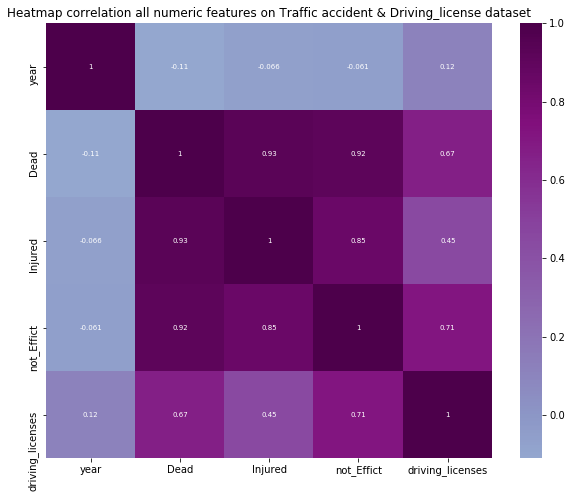

In [1556]:
plt.figure(figsize=(10,8)) # control the size of our fig
sns.heatmap(data_merging.corr() , annot=True, annot_kws={"size": 7}, cmap='BuPu', center=0);
plt.title('Heatmap correlation all numeric features on Traffic accident & Driving_license dataset')
# sns.heatmap(dataset_merging.corr(), annot=True,mask=dataset_merging.corr()<0, cmap='BuPu'); # mask tell what we don't value to display

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [1557]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(f'Histogram of {column}')
        ax[i].set_xlabel

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

/Users/aseel/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/aseel/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


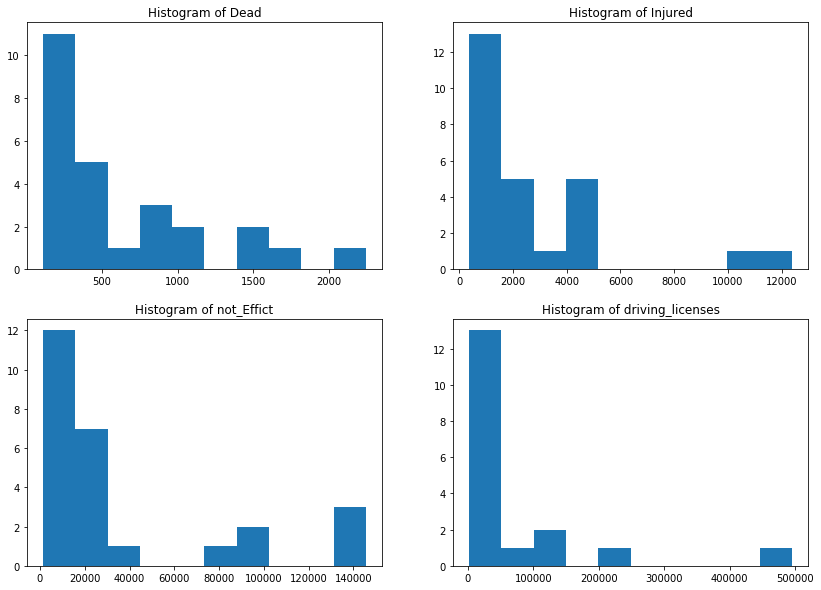

In [1558]:
dataset_merging_columns = data_merging.columns[2:6]
list_of_xlabels = data_merging.columns[2:6]
subplot_histograms(data_merging, dataset_merging_columns, list_of_titles, list_of_xlabels)

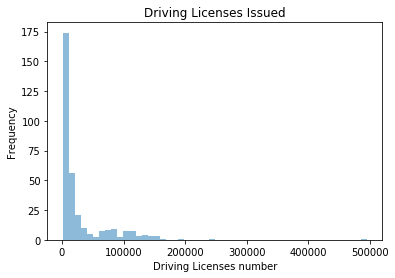

In [1559]:
y = driving_license.driving_licenses
x = driving_license.year
driving_license.driving_licenses.plot.hist(bins=50,alpha=0.5);
plt.title('Driving Licenses Issued')
plt.xlabel('Driving Licenses number');

Text(0.5, 0, 'Traffic Accidents number')

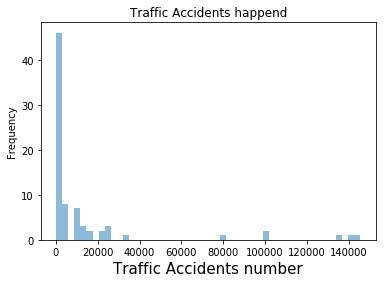

In [1560]:
y = traffic_accidents.num_traffic_accidents
x = traffic_accidents.year
traffic_accidents.num_traffic_accidents.plot.hist(bins=50,alpha=0.5);
plt.title('Traffic Accidents happend')
plt.xlabel('Traffic Accidents number', fontsize=15)

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [1561]:
def scatterplot(x, y, title, xlabel, ylabel,df):
    plt.figure(figsize=(12,4))
    x = df[x]
    y = df[y]
    sns.scatterplot(x,y) 
    sns.regplot(x,y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [1562]:
dataset_merging_2016 = dataset_merging.set_index('year').loc[2016,:].reset_index()
dataset_merging_2017 = dataset_merging.set_index('year').loc[2017,:].reset_index()

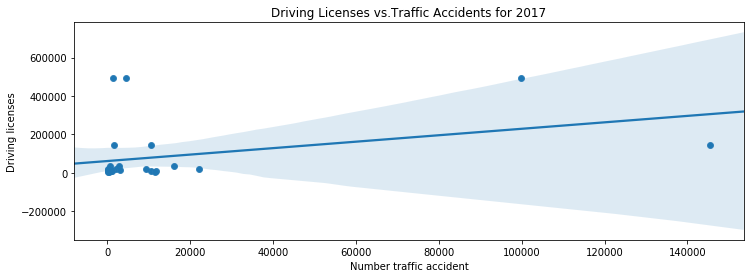

In [1563]:
# Driving Licenses vs. Traffic Accidents for 2017
scatterplot('num_traffic_accidents',
            'driving_licenses',
            'Driving Licenses vs.Traffic Accidents for 2017',
            'Number traffic accident',
            'Driving licenses', dataset_merging_2017)

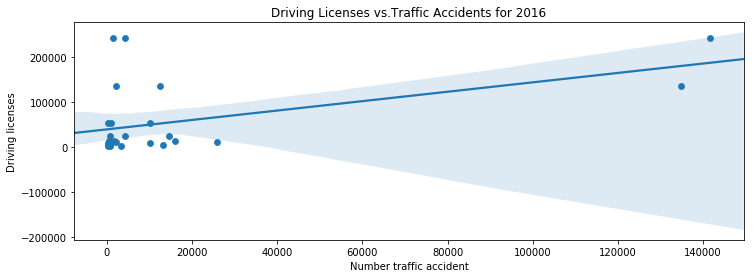

In [1564]:
# Driving Licenses vs. Traffic Accidents for 2016
scatterplot('num_traffic_accidents',
            'driving_licenses',
            'Driving Licenses vs.Traffic Accidents for 2016',
            'Number traffic accident',
            'Driving licenses', dataset_merging_2016)

In [1565]:
# Driving Licenses for 2016 vs 2017
driving_license_vs = driving_license.set_index('year').loc[[2016,2017]].reset_index()
# driving_license_2017 = driving_license.set_index('year').loc[2017,:].reset_index()

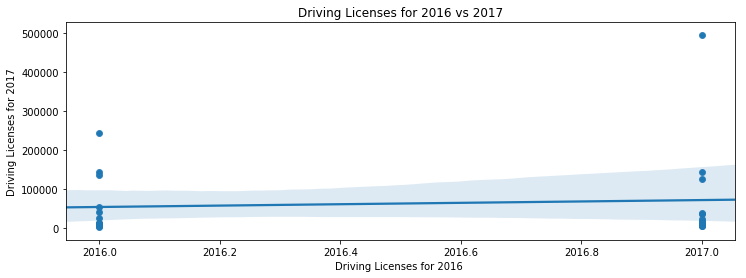

In [1566]:
scatterplot('year',
            'driving_licenses',
            'Driving Licenses for 2016 vs 2017',
            'Driving Licenses for 2016 ',
            'Driving Licenses for 2017', driving_license_vs)

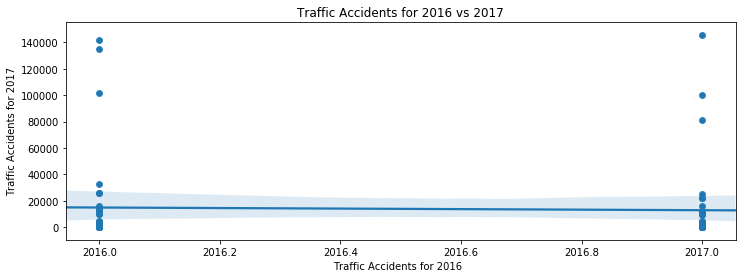

In [1567]:
# Traffic Accidents for 2016 vs 2017
scatterplot('year',
            'num_traffic_accidents',
            'Traffic Accidents for 2016 vs 2017',
            'Traffic Accidents for 2016  ',
            'Traffic Accidents for 2017', traffic_accidents)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [1568]:
#normalizaion ( scale data to range [0,1])
def normalize(*args): 
    return (x - x.min())/(x.max() - x.min())

In [1571]:
dataset_merging_scaled = normalize(dataset_merging.columns[1:3])
dataset_merging.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 10 columns):
year                         54 non-null int64
region                       54 non-null object
num_traffic_accidents        54 non-null int64
latitude_accidents           54 non-null object
longitude_accidents          54 non-null object
num_accidents_result         54 non-null object
accidents_result             54 non-null object
driving_licenses             54 non-null int64
latitude_driving_licenes     54 non-null object
longitude_driving_licenes    54 non-null object
dtypes: int64(3), object(7)
memory usage: 4.6+ KB


In [1579]:
dropped_datasets = dataset_merging.drop(['region', 'latitude_accidents', 'longitude_accidents', 'latitude_driving_licenes', 'longitude_driving_licenes'], axis=1) # just try to chan the display
dataset_merging_scaled = normalize(dropped_datasets)

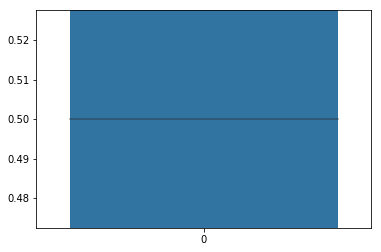

In [1581]:
sns.boxenplot(data= dataset_merging_scaled);

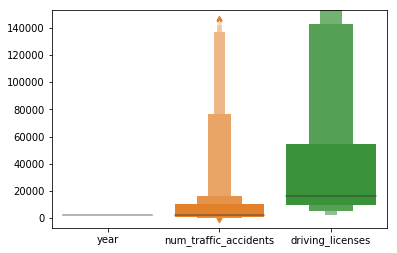

In [1425]:
sns.boxenplot(data= dataset_merging.drop(['region',
                                         'latitude_accidents',
                                         'longitude_accidents',
                                         'latitude_driving_licenes',
                                         'longitude_driving_licenes'], axis=1));

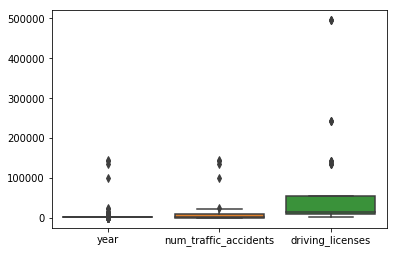

In [1426]:
# Code
sns.boxplot(['year','num_traffic_accidents'], data=dataset_merging,orient ='v');
sns.boxplot(data=dataset_merging.drop(['region',
                                         'latitude_accidents',
                                         'longitude_accidents',
                                         'latitude_driving_licenes',
                                         'longitude_driving_licenes'],
                                        axis=1)); # just try to chan the display


In [1427]:
def boxplot(numeric_var):
    sns.boxplot(dataset_merging[numeric_var])
    plt.title(f'Box plot of {numeric_var}')
    plt.axvline(dataset_merging[numeric_var].mean(),
                c='g')
    print(f'skew: {dataset_merging[numeric_var].skew()}')

skew: 3.2802597225206642


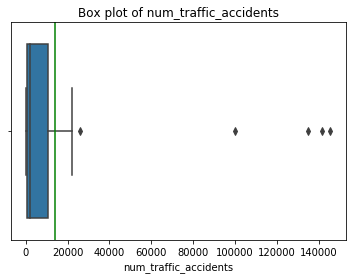

In [1428]:
boxplot('num_traffic_accidents')

skew: 2.615810221431933


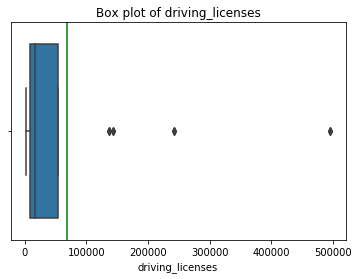

In [1429]:
boxplot('driving_licenses')

It's all value have a right skewd i think that related on the region that have Population density

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [1430]:
dataset_merging.describe()

,year,num_traffic_accidents,driving_licenses
count,54.000000,54.000000,54.000000
mean,2016.500000,14141.388889,69517.555556
std,0.504695,34135.863621,121932.017236
min,2016.000000,112.000000,2153.000000
25%,2016.000000,592.750000,9371.000000
50%,2016.500000,1965.500000,16085.000000
75%,2017.000000,10584.500000,54507.000000
max,2017.000000,145541.000000,495307.000000


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: normal distribution is defined by two metrics, a mean and a standard deviation i observe we have mean and std positive value 

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [923]:
driving_license.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 0 to 349
Data columns (total 5 columns):
year                         325 non-null int64
region                       325 non-null object
driving_licenses             325 non-null int64
latitude_driving_licenes     325 non-null object
longitude_driving_licenes    325 non-null object
dtypes: int64(2), object(3)
memory usage: 25.2+ KB


In [925]:
# fast way with scipy.stats
t_test_result = stats.ttest_ind(traffic_accidents['num_traffic_accidents'], driving_license['driving_licenses'])
t_test_result.statistic, t_test_result.pvalue

(-2.6619591612798374, 0.008081129424577869)

In [926]:
# let's visualize t-stat
xpts = np.linspace(-4, 4, 500)
ypts = stats.t.pdf(xpts, len(traffic_accidents) + len(driving_license) - 2, 0, 1)

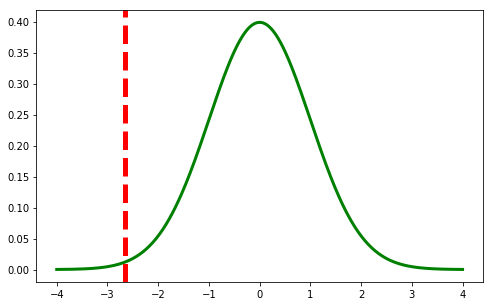

In [930]:
# plot the t-distribution
fig = plt.figure(figsize=(8, 5)) 
ax = fig.gca() 
ax.plot(xpts, ypts, linewidth=3, color='green')
ax.axvline(t_test_result.statistic, color='red', lw=5, linestyle='--')
plt.show()


## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer: